<a href="https://colab.research.google.com/github/daveselinger/covid-19-hackathon/blob/master/by_state_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19
!head -5 COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv

Cloning into 'COVID-19'...
remote: Enumerating objects: 14601, done.
remote: Total 14601 (delta 0), reused 0 (delta 0), pack-reused 14601
Receiving objects: 100% (14601/14601), 46.87 MiB | 39.93 MiB/s, done.
Resolving deltas: 100% (6992/6992), done.
﻿Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,,,,
Confirmed,Globally,,282,314,581,846,1320,2014,2798,4593,6065,7818,9826,11953,14557,17391,20630,24554,28276,31481,34886,37558,40554,43103,45171,46997,49053,50580,51857,71429,73332,75204,75748,76769,77794,78811,79331,80239,81109,82294,83652,85403,87137,88948,90870,9309

In [4]:
!pip install -U plotly
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.5.4)
  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-o2l_jj4b
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-o2l_jj4b
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [9]:
!pip install us

     |████████████████████████████████| 133kB 4.1MB/s 
  Created wheel for us: filename=us-1.0.0-cp36-none-any.whl size=11833 sha256=db286cd9babd4db294c641d8e5500997a773571c3a530afbb6df3f779d6c35bf
  Stored in directory: /root/.cache/pip/wheels/b3/98/40/cb8be35d7779a0ae4372c84e7a585c947bfc41540fd8999e53
  Created wheel for jellyfish: filename=jellyfish-0.5.6-cp36-cp36m-linux_x86_64.whl size=74544 sha256=195cc37fdfb4a3d0521f843f44f688b6976c0af6e9e33779389c25eadf50087d
  Stored in directory: /root/.cache/pip/wheels/3b/29/06/8d686d24f742cb89e7bde7f26f18cb9e89b3c8bcd6999cb12a
Successfully built us jellyfish


In [32]:
!pip install chart-studio

In [45]:
!wget http://originaldougal.com/wp-content/uploads/2013/09/united-states-counties.csv.zip
!unzip united-states-counties.csv.zip

--2020-03-15 00:09:12--  http://originaldougal.com/wp-content/uploads/2013/09/united-states-counties.csv.zip
Resolving originaldougal.com (originaldougal.com)... 23.111.167.10
Connecting to originaldougal.com (originaldougal.com)|23.111.167.10|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://originaldougal.com/wp-content/uploads/2013/09/united-states-counties.csv.zip [following]
--2020-03-15 00:09:12--  https://originaldougal.com/wp-content/uploads/2013/09/united-states-counties.csv.zip
Connecting to originaldougal.com (originaldougal.com)|23.111.167.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16320 (16K) [application/zip]
Saving to: ‘united-states-counties.csv.zip’

united-states-count 100%[===================>]  15.94K  --.-KB/s    in 0.03s   

2020-03-15 00:09:12 (546 KB/s) - ‘united-states-counties.csv.zip’ saved [16320/16320]

Archive:  united-states-counties.csv.zip
  inflating: united-states-counties.csv  
   

In [35]:
from __future__ import print_function

import numpy as np 
import chart_studio.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pandas as pd
import us
pd.__version__


'0.25.3'

In [11]:
covid_across_countries_df = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
covid_across_countries_df.head(10)



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,9,12,13,21,21,27,32,32,39,46,64
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,9,9,10,10,10,11,11,15,18,21,21,36
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,9,9,9,11,11,13,13,13,15,15,18,20,20,35
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,5


In [12]:
global_timeseries = covid_across_countries_df.set_index(['Country/Region','Province/State'])
global_timeseries.head(5)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200
Nepal,NaN,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Malaysia,NaN,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197


In [13]:
us_timeseries = global_timeseries.loc['US']
us_timeseries.head(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Province/State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Washington,47.4009,-121.4905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,267,366,442,568
New York,42.1657,-74.9481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,220,328,421
California,36.1162,-119.6816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,177,221,282
Massachusetts,42.2302,-71.5301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,95,108,123
Diamond Princess,35.4437,139.6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,36,42,42,44,44,44,45,45,45,45,45,45,45,45,46,46,46,46


In [0]:

# df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
# df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
# df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
# df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
#               "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
#               "#08519c","#0b4083","#08306b"]
# endpts = list(np.linspace(1, 12, len(colorscale) - 1))
# fips = df_sample['FIPS'].tolist()
# values = df_sample['Unemployment Rate (%)'].tolist()

# fig = ff.create_choropleth(
#     fips=fips, values=values,
#     binning_endpoints=endpts,
#     colorscale=colorscale,
#     show_state_data=False,
#     show_hover=True, centroid_marker={'opacity': 0},
#     asp=2.9, title='USA by Unemployment %',
#     legend_title='% unemployed'
# )
# fig.show()

In [0]:
#county_df = pd.read_csv('united-states-counties.csv', header=None, names=['county', 'state'])

#county_df = county_df.set_index('state')
#county_df.loc[county_df['state'].isin(['California', 'Arizona'])]
#county_df.head(10)
#raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
#'age': [20, 19, 22, 21],
#'favorite_color': ['blue', 'blue', 'yellow', "green"],
#'grade': [88, 92, 95, 70]}
#df = pd.DataFrame(raw_data)
#df.head()
#df.loc[df['favorite_color'] == 'blue']
#county_df.loc[df['state']=='Alabama']
#county_df.head(5)


Using the documentation from the posts on geopandas:

https://medium.com/@erikgreenj/mapping-us-states-with-geopandas-made-simple-d7b6e66fa20d
https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

And then downloading the shape files from the US Census from 2017:
https://www2.census.gov/geo/tiger/GENZ2017/shp/

Future todo: consider using Bokeh to make it interactive... Make it slide based on date. Let's just get it working for now...


In [0]:
!wget https://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_500k.zip
!unzip cb_2017_us_state_500k.zip


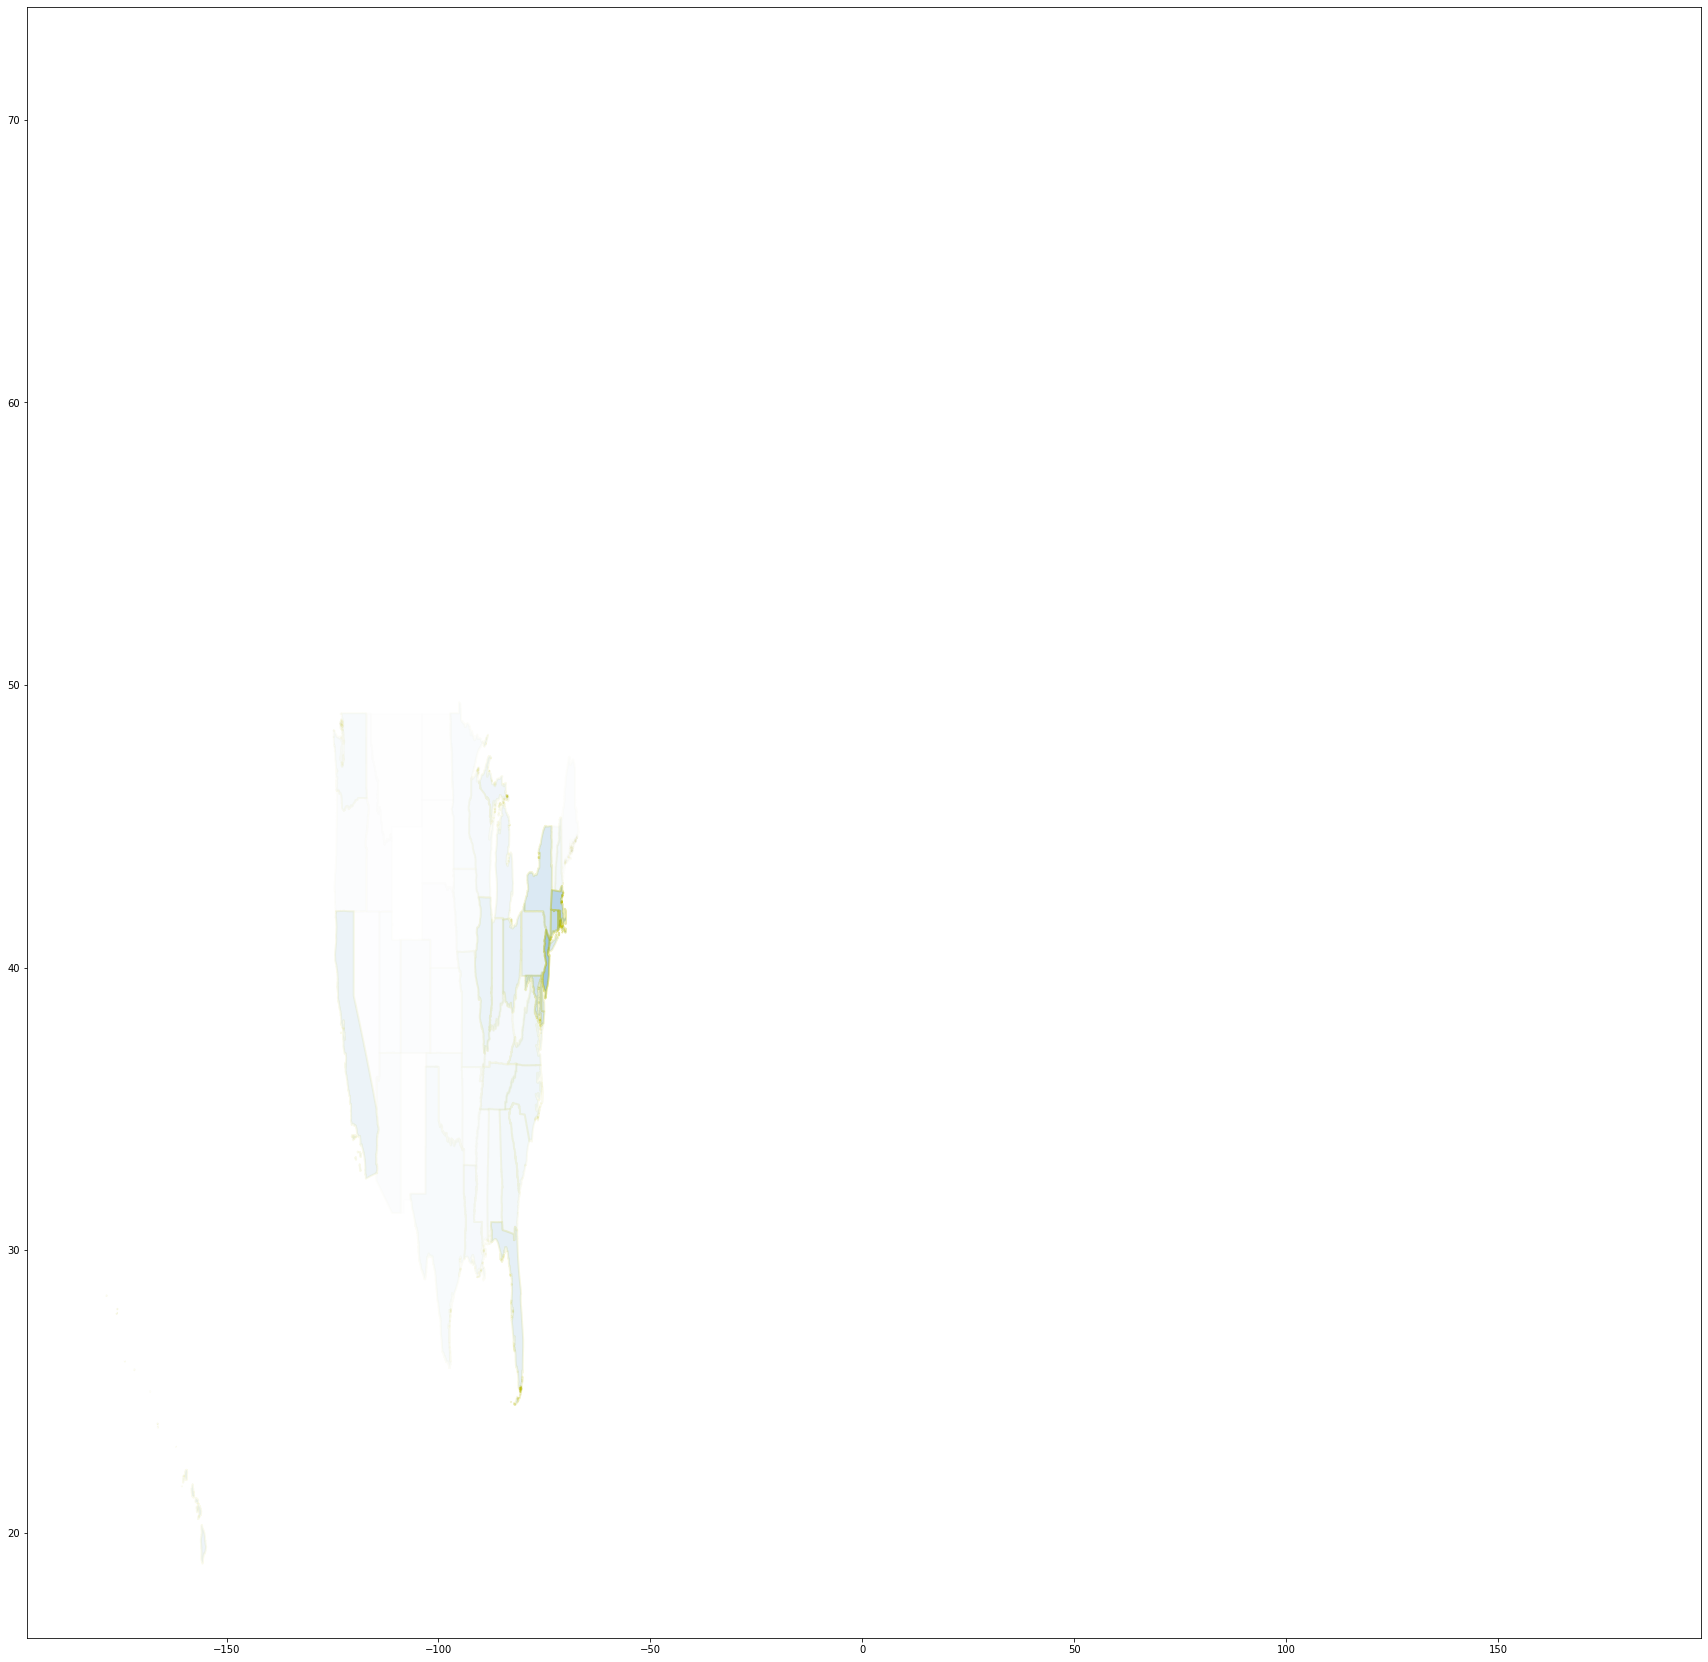

In [139]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = []
values = []
for state, pop_density in popdensity.items():
  fips.append(us.states.lookup(state).fips)
  values.append(pop_density)

usa_shapes = gpd.read_file('cb_2017_us_state_500k.shp')
#usa_shapes.plot()

fig, ax = plt.subplots(figsize=(30,30))
for state, pop_density in popdensity.items():
  usa_shapes[usa_shapes['NAME']==state].plot(ax=ax, edgecolor='y', linewidth=2, alpha=pop_density/1000.0)




In [119]:
!npm install d3-geomap

npm WARN deprecated topojson@3.0.2: Use topojson-client, topojson-server or topojson-simplify directly.
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ d3-geomap@3.3.0
added 25 packages from 5 contributors in 4.262s


In [123]:
import geomap from d3-geomap

map = geomap..geofile('/d3-geomap/topojson/world/countries.json').draw(d3.select('#map'));


SyntaxError: ignored